In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\Users\avina\OneDrive\Documents\NareshIT\DATA SCIENCE & AI\Data files\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box Plot**`

- Box plot is used for detect outliers
- Box plot has min value q1,q2,q3 and max value
- Inside box plot red line represents median as 50 percentile data
**Outliers**
- Very very huge observation
- Very very small observation
- which pulls the data in any side of the distribution
- Mild outliers
    - q1-1.5*IQR and q3+1.5*IQR
- Strong outliers
    - q1-3*IQR and q3+3*IQR
- IQR: Inter Quartile Range
    - IQR: Q3-Q1
- q1:25p
- q2:50p
- q3:75p

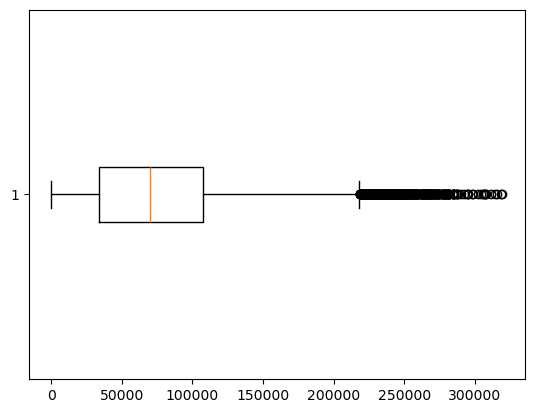

In [4]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

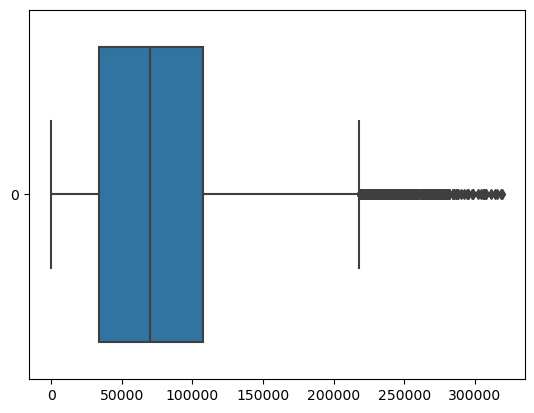

In [17]:
sns.boxplot(visa_df['prevailing_wage'],
            orient='h')
plt.show()

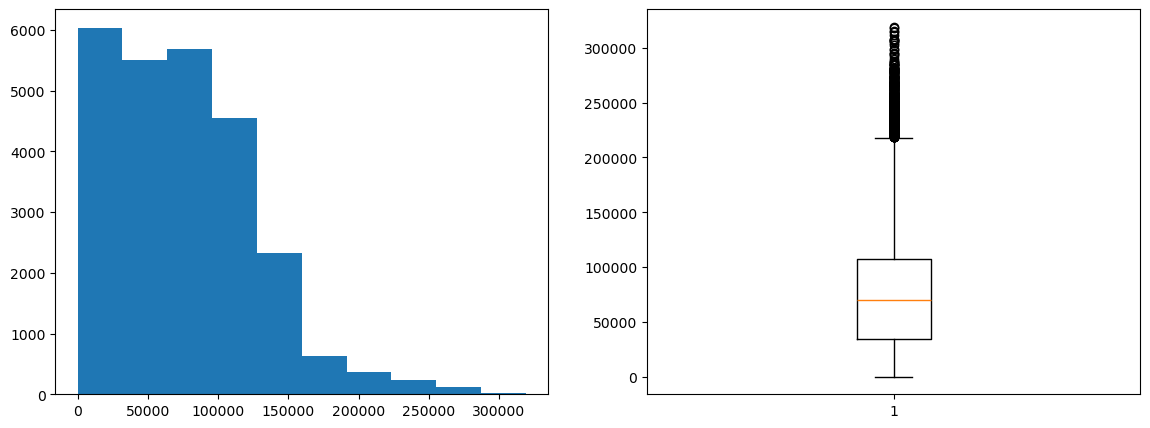

In [5]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**Finding the outliers**

- Outliers are available less than q1-1.5*IQR
- outliers are available greater than q3+1.5*IQR
- Step1
    - calculate q1 = 25P
    - calculate q3 = 75P
    - calculate IQR:q3-q1
- Step2:
    - LB=q1-1.5*IQR    (LB:Lower Bound)
    - UB=q3+1.5*IQR   (UB:Upper Bound)
- Step3:
    - con1=visa_df['prevailing_wage']<LB
    - con2=visa_df['prevailing_wage']<UB
    - apply OR operator and get the outliers data


In [6]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
print(F"Q1 of 25% is:{Q1}")
print(F"Q3 of 25% is:{Q3}")

Q1 of 25% is:34015.48
Q3 of 25% is:107735.51


In [7]:
IQR=Q3-Q1
IQR

73720.03

In [8]:
LB=Q1-1.5*IQR
LB

-76564.565

In [9]:
UB=Q3+1.5*IQR
UB

218315.555

In [10]:
len(visa_df['prevailing_wage'])

25480

**Outliers data**

In [49]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con1,con2
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

**Non_outliers data**

In [52]:
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
con1,con2
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outliers data**

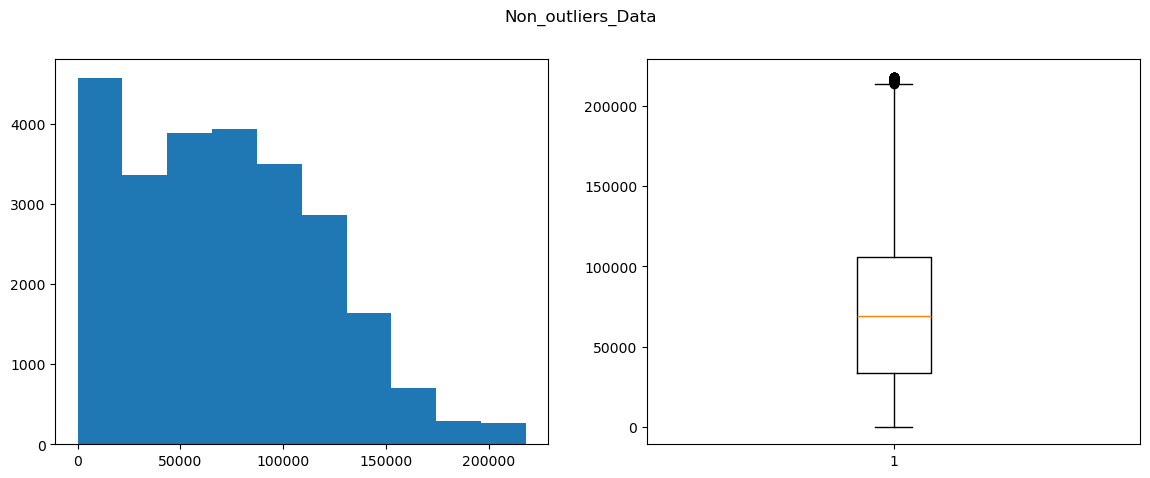

In [55]:
plt.figure(figsize=(14,5))
plt.suptitle('Non_outliers_Data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**comparing total data with non_outliers data**

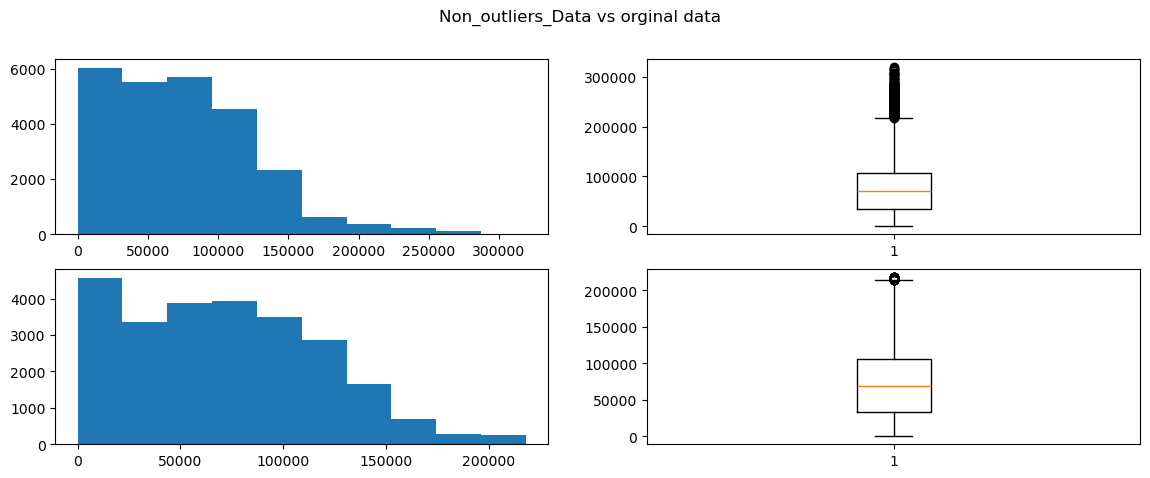

In [64]:
plt.figure(figsize=(14,5))
plt.suptitle("Non_outliers_Data vs orginal data")
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'])  #25053  
plt.subplot(2,2,4).boxplot(non_outliers_data['prevailing_wage']) #25053
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'])  #25480
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage']) #25480
plt.show()

**How to deal outliers**
**Method 1**
- Drop the outliers but it is not good idea
- when you drop the outliers, data will loss
- for e.g: here we are dropping 427 rows
- x% of 25480=427
- it is 1.7% data, here it is fine we can drop the outlier

**Method2: Fill with median value**
- we arleady know that outliers does not affect the median
- so we can fill outliers by median

**Method3: Cap the values with Q1 and Q3**
- all less than lower bound values we can replace with Q1 or LB
- All greater than upper bound values, we can replace with Q3 or UB

**Fill with median**

In [84]:
median = visa_df['prevailing_wage'].median()
median

70308.20999999999

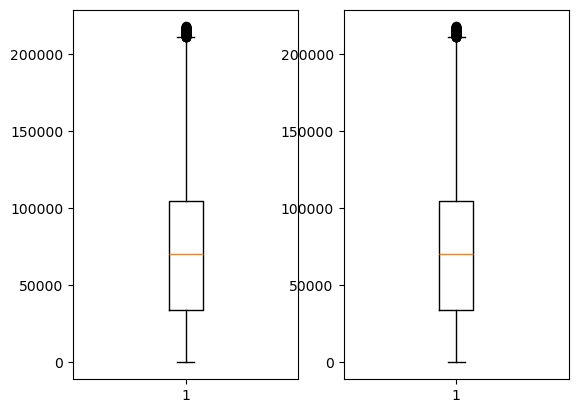

In [85]:
l=[]
for i in (visa_df['prevailing_wage'].values):
    if i <LB or i>UB:
        l.append(median)
    else:
        l.append(i)
        
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()

**np.where**

- np.where will use for binary condition
- it has 3 arguments
    - condition
    - Value if condition is True
    - Value if condition is False

In [88]:
d={"sub":["DS","ML","CS"],
   "marks":[100,150,20]}
data=pd.DataFrame(d)
data

,sub,marks
0,DS,100
1,ML,150
2,CS,200


#Marks coloumn should replace with 1 when value greater than 100
#else same value

#output

#Marks  #Marks
#100    #100
#150     #1 
#20     #20

In [92]:
con=data["marks"]>100
l=np.where(con,1,data["marks"])
#if condition True then replace with :1
#if conditon False then replace with: data["marks"]
l

array([100,   1,   1], dtype=int64)

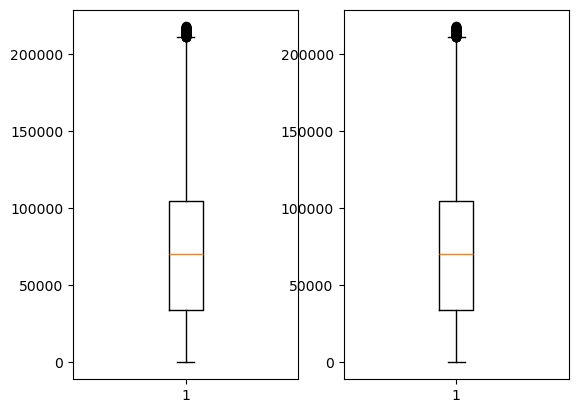

In [96]:
cond1 = visa_df['prevailing_wage']<LB
cond2 = visa_df['prevailing_wage']>UB
con = cond1 | cond2
median=visa_df['prevailing_wage'].median()
l = np.where(con, median, visa_df['prevailing_wage'])
visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()